In [1]:
import os
os.chdir('/home/giq/Desktop/cdisc/')
import sys
sys.path.insert(0, os.getcwd())

import numpy as np
from numerics.utilities.misc import *
import pickle
import numpy as np
from tqdm import tqdm
import argparse
import matplotlib.pyplot as plt


In [67]:
Ntraj = 1000
omega0, omega1 = 1e4, 1.05e4
omega0, omega1 = 1e4, 1.1e4

omega_pro = (omega0 + omega1)/2
period = (2*np.pi/omega_pro)
dt = period/100
total_time = 1000*period
exp_path = "freqs/{}/".format([omega0,omega1])
save_path = get_path_config(exp_path=exp_path,total_time=total_time, dt=dt, noitraj=True)

times = np.arange(0, total_time+ dt, dt )
indis = np.linspace(0,len(times)-1, int(1e4)).astype(int)
timind = [times[k] for k in indis]
indis_range = list(range(len(indis)))

#B = 6.
#dB = .05
B = 10000
dB = 500
boundsB= np.arange(-B,B+dB,dB)

bpos = boundsB[boundsB>=0]
bneg = boundsB[boundsB<0]


def load_traj(itraj, what="logliks.npy", flip_params=0):
    gamma0 = gamma1 = 100
    eta0 = eta1 = 1
    kappa0 = kappa1 = 1e3
    n0 = n1 = 1
    omega0, omega1 = 1e4, 1.05e4
    omega0, omega1 = 1e4, 1.1e4

    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]

    omega_pro = (omega0 + omega1)/2
    period = (2*np.pi/omega_pro)
    dt = period/100
    total_time = 1000*period
    if flip_params == 1:
        params = [h0, h1]
    else:
        params = [h1,h0]
    exp_path = str(params)+"/"

    l =load_data(exp_path=exp_path, itraj=itraj, total_time=total_time, dt=dt, what=what)
    return l

In [47]:
os.makedirs("figures_freq",exist_ok=True)

In [48]:
path_data = save_path+"B{}_db{}_{}/".format(B,dB,Ntraj)


In [49]:
times_to_errs_det = np.load(path_data+"times_to_err_det.npy")
times_sequential =np.load(path_data+"times_to_err_stoch.npy")

In [50]:
ll0 =np.load(path_data+"ll0.npy")#,np.stack(l0t))
ll1 = np.load(path_data+"ll1.npy")#,np.stack(l1t))

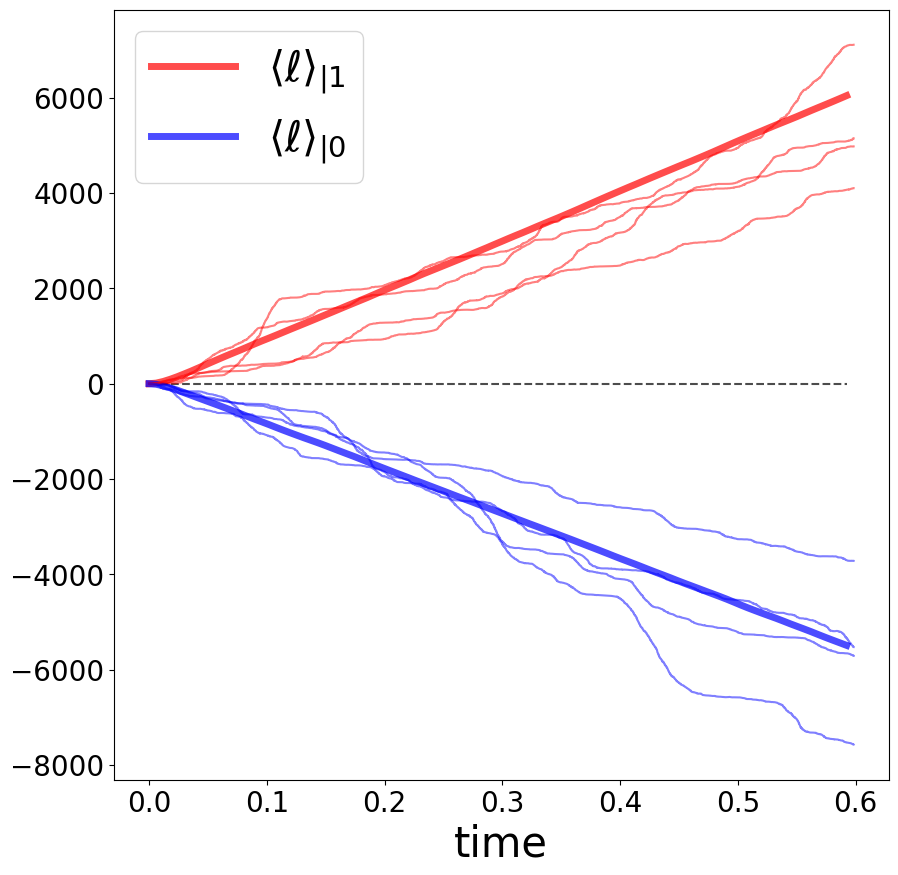

In [51]:
plt.figure(figsize=(10,10))
ax=plt.subplot()
timindt = timind[::100]
ax.plot(timindt,np.mean(ll1,axis=0),color="red", alpha=.7, linewidth=5,label=r'$\langle\ell\rangle_{|1}$')
ax.plot(timindt,np.mean(ll0,axis=0),color="blue", alpha=.7, linewidth=5,label=r'$\langle\ell\rangle_{|0}$')
ax.plot(timindt,0.*np.mean(ll0,axis=0),'--',color="black", alpha=.7)#, linewidth=2#,label="0")

for itraj in range(1,5):
    [l0_1,l1_1], [l1_0,l0_0] = load_traj(itraj=itraj,what="logliks.npy", flip_params=0).T, load_traj(itraj=itraj,what="logliks.npy", flip_params=1).T
    log_lik_ratio, log_lik_ratio_swap = l1_1-l0_1, l1_0-l0_0
    ax.plot(timind,log_lik_ratio,alpha=.5, color="red")
    ax.plot(timind,log_lik_ratio_swap, alpha=.5, color="blue")   
ax.legend(prop={"size":30})
ax.set_xlabel("time",size=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#plt.savefig("figures_freq/mean_time.pdf")

In [52]:
np.arming(timstats

SyntaxError: unexpected EOF while parsing (531280803.py, line 1)

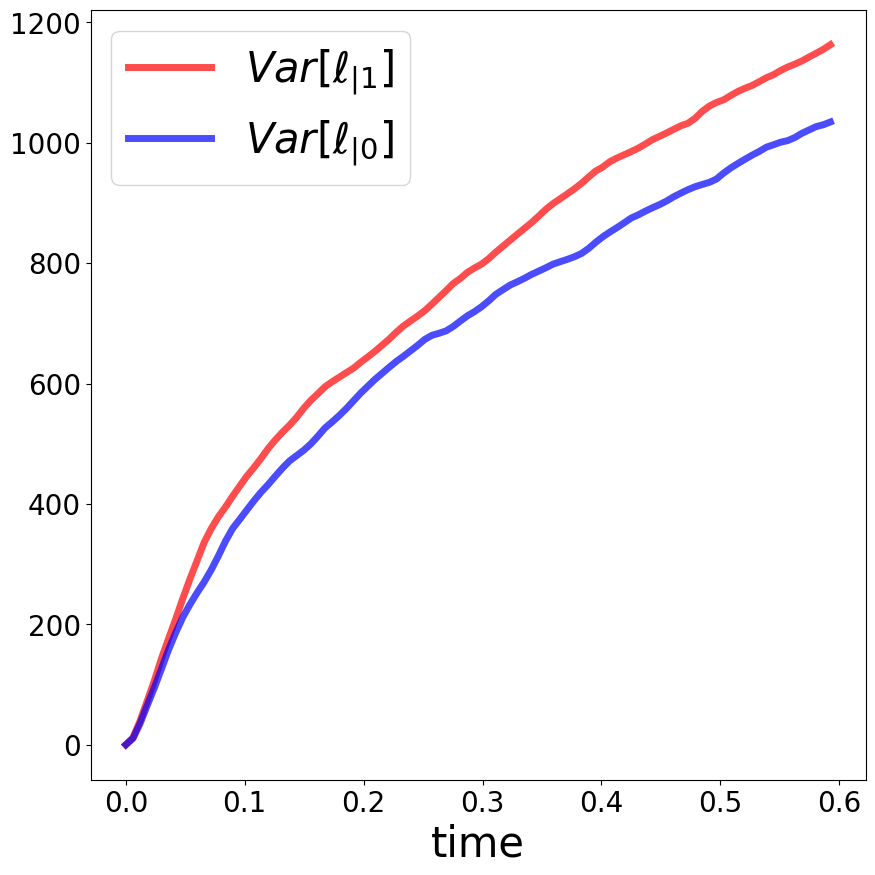

In [53]:
plt.figure(figsize=(10,10))
ax=plt.subplot()
timindt = timind[::100]
ax.plot(timindt,np.std(ll1,axis=0),color="red", alpha=.7, linewidth=5,label=r'$Var[\ell_{|1}]$')
ax.plot(timindt,np.std(ll0,axis=0),color="blue", alpha=.7, linewidth=5,label=r'$Var[\ell_{|0}]$')
ax.legend(prop={"size":30})
ax.set_xlabel("time",size=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#plt.savefig("figures_freq/var_time_200.pdf")

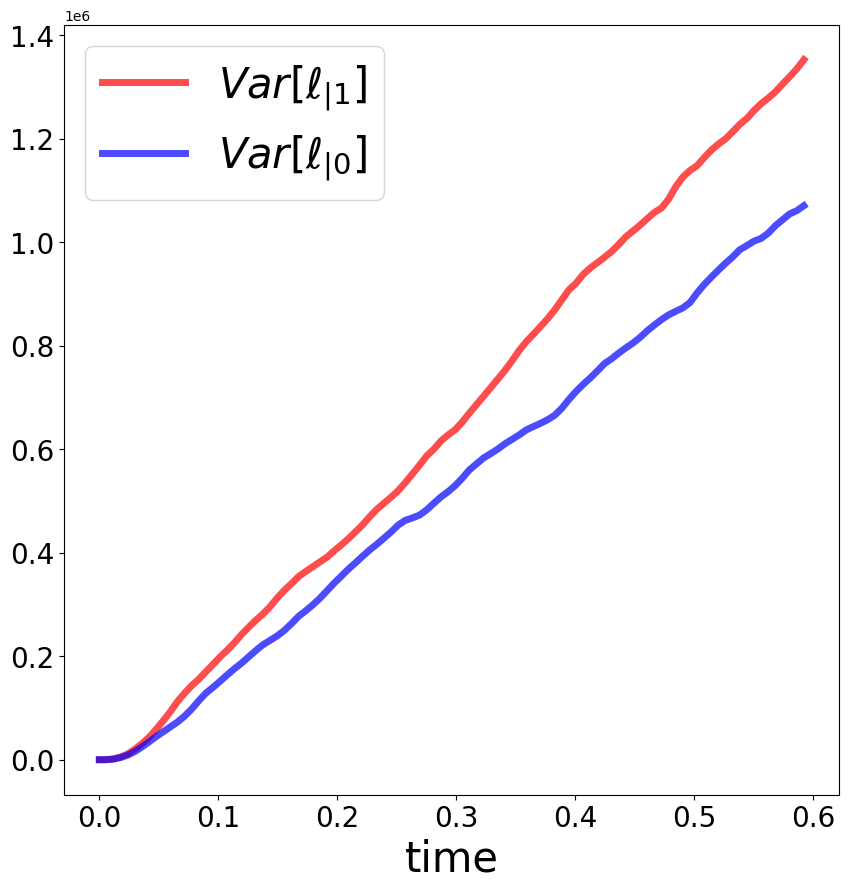

In [54]:
plt.figure(figsize=(10,10))
ax=plt.subplot()
timindt = timind[::100]
ax.plot(timindt,np.std(ll1,axis=0)**2,color="red", alpha=.7, linewidth=5,label=r'$Var[\ell_{|1}]$')
ax.plot(timindt,np.std(ll0,axis=0)**2,color="blue", alpha=.7, linewidth=5,label=r'$Var[\ell_{|0}]$')
ax.legend(prop={"size":30})
ax.set_xlabel("time",size=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.savefig("figures_freq/var_time_200.pdf")

/tmp/ipykernel_268953/1744262549.py:4: RuntimeWarning: invalid value encountered in divide
  ax.plot(timindt,np.std(ll1,axis=0)**2/timindt,color="red", alpha=.7, linewidth=5,label=r'$Var[\ell_{|1}]$')
/tmp/ipykernel_268953/1744262549.py:5: RuntimeWarning: invalid value encountered in divide
  ax.plot(timindt,np.std(ll0,axis=0)**2/timindt,color="blue", alpha=.7, linewidth=5,label=r'$Var[\ell_{|0}]$')


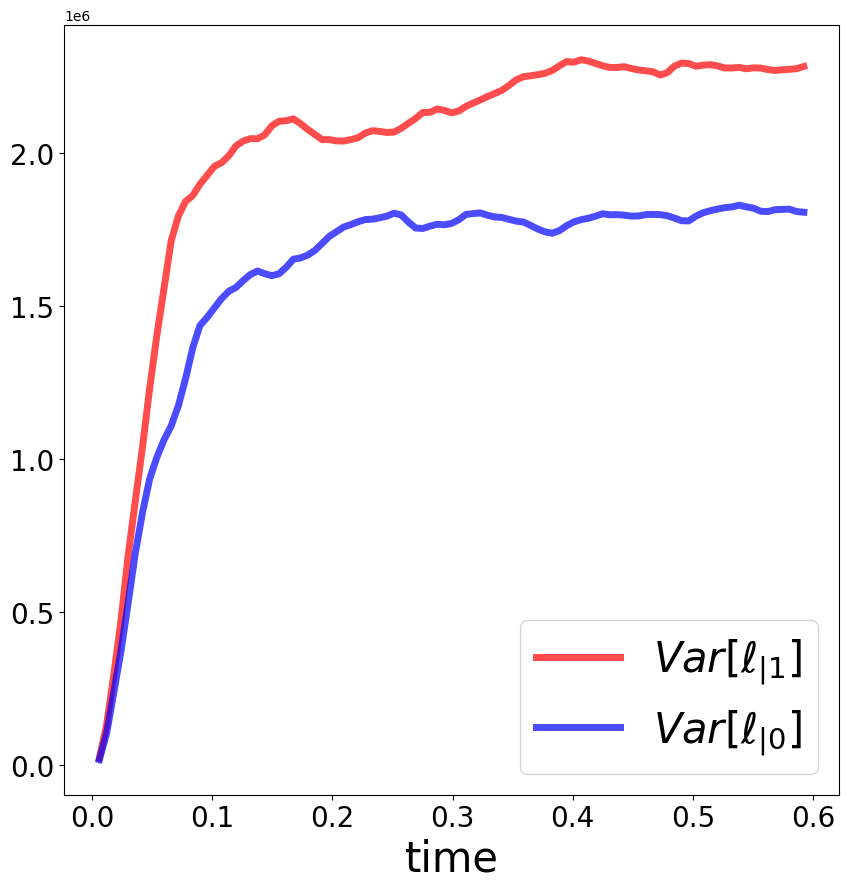

In [55]:
plt.figure(figsize=(10,10))
ax=plt.subplot()
timindt = timind[::100]
ax.plot(timindt,np.std(ll1,axis=0)**2/timindt,color="red", alpha=.7, linewidth=5,label=r'$Var[\ell_{|1}]$')
ax.plot(timindt,np.std(ll0,axis=0)**2/timindt,color="blue", alpha=.7, linewidth=5,label=r'$Var[\ell_{|0}]$')
ax.legend(prop={"size":30})
ax.set_xlabel("time",size=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.savefig("figures_freq/var_time_200.pdf")

In [68]:
def give_me_gauss(b, mu,sigma,xrange):
    gauss = lambda x,m,g: np.exp(-((x-m)**2)/(2*g**2))/np.sqrt(2*np.pi*g**2)
    xx = np.linspace(xrange[0], xrange[1],500)
    return xx, np.array([gauss(x, mu, sigma) for x in xx])


indistats = -1
c1, b1 = np.histogram(ll1[:,indistats], bins=50, normed=True)
c0, b0 = np.histogram(ll0[:,indistats], bins=50, normed=True)

timstats = [times[k] for k in np.linspace(0,len(times)-1,ll0.shape[1]).astype(int)]

/tmp/ipykernel_268953/3046841863.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  c1, b1 = np.histogram(ll1[:,indistats], bins=50, normed=True)
/tmp/ipykernel_268953/3046841863.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  c0, b0 = np.histogram(ll0[:,indistats], bins=50, normed=True)


In [69]:
def fit_2moments(timind,l1_mean, l1_std, ini=10, fini=-1):


    sqrtimind = np.array(np.sqrt(timind))
    timind = np.array(timind)

    mu, oomu = np.polyfit(timind[ini:fini], np.abs(l1_mean)[ini:fini],1)
    sigma, oosig = np.polyfit(np.array(np.sqrt(timind))[ini:fini], l1_std[ini:fini],1)
    
    return [mu, oomu], [sigma, oosig]

In [70]:
ll1.shape

(999, 100)

In [71]:
[mu1, oomu1], [sigma1, oosig1] = fit_2moments(timstats,np.mean(ll1, axis=0),np.std(ll1, axis=0))
[mu0, oomu0], [sigma0, oosig0] = fit_2moments(timstats,np.mean(ll0, axis=0),np.std(ll0, axis=0))

/tmp/ipykernel_268953/3878569800.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  c1, b1 = np.histogram(ll1[:,indistats], bins=50, normed=True)
/tmp/ipykernel_268953/3878569800.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  c0, b0 = np.histogram(ll0[:,indistats], bins=50, normed=True)
/tmp/ipykernel_268953/3878569800.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-un

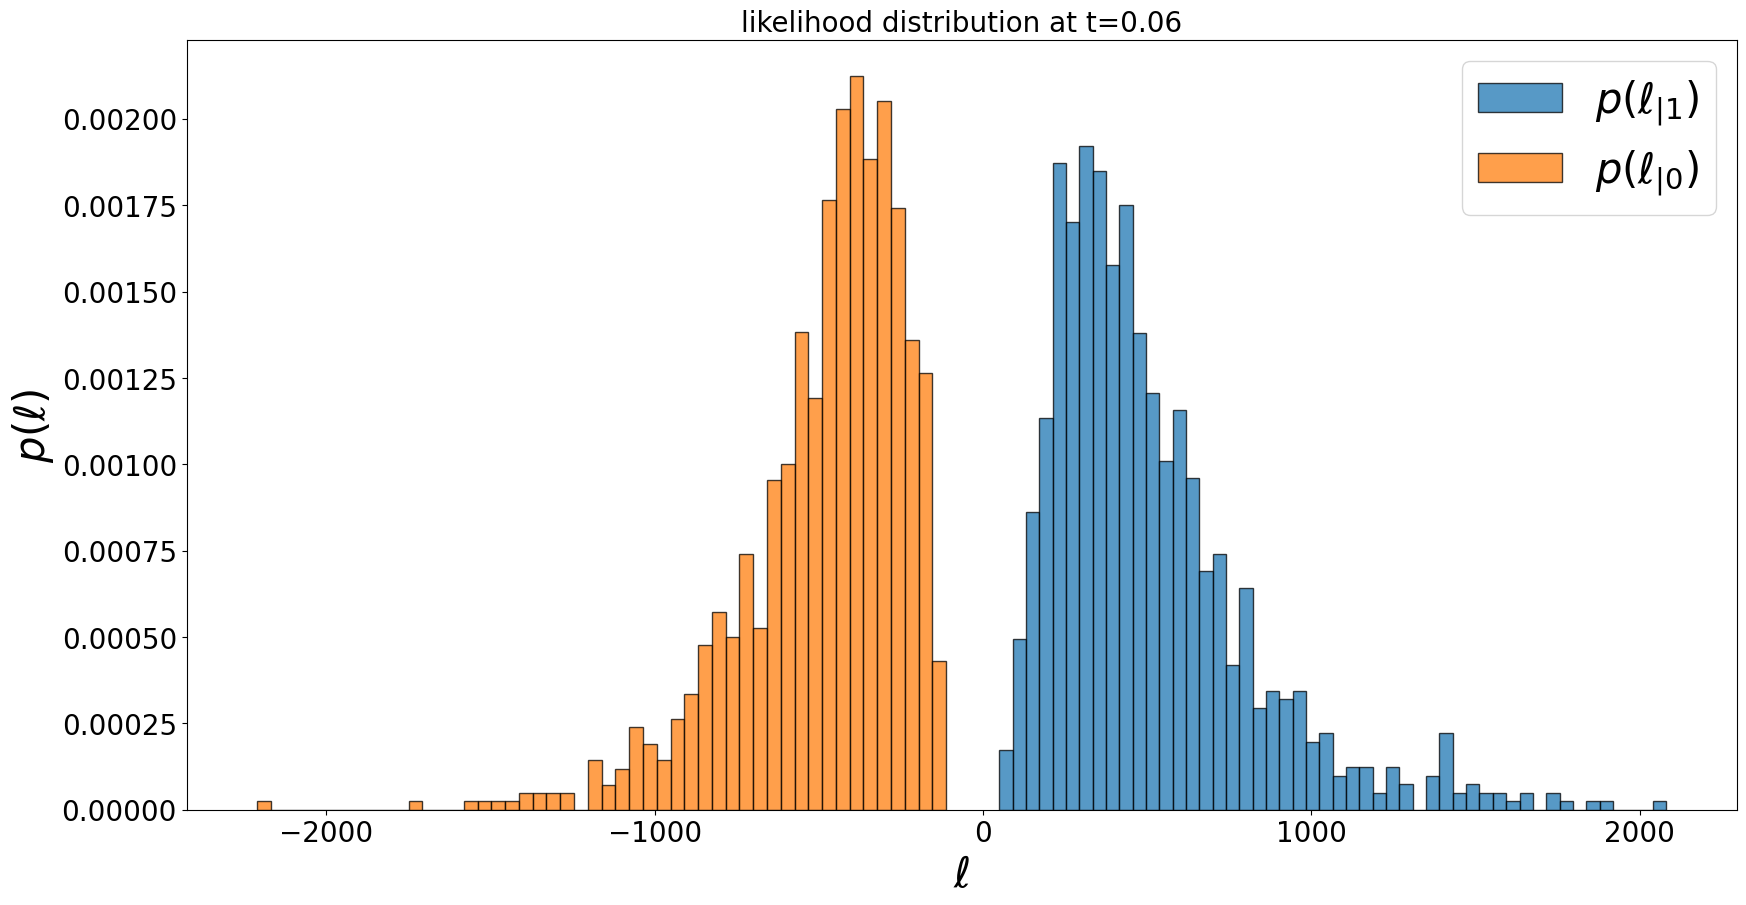

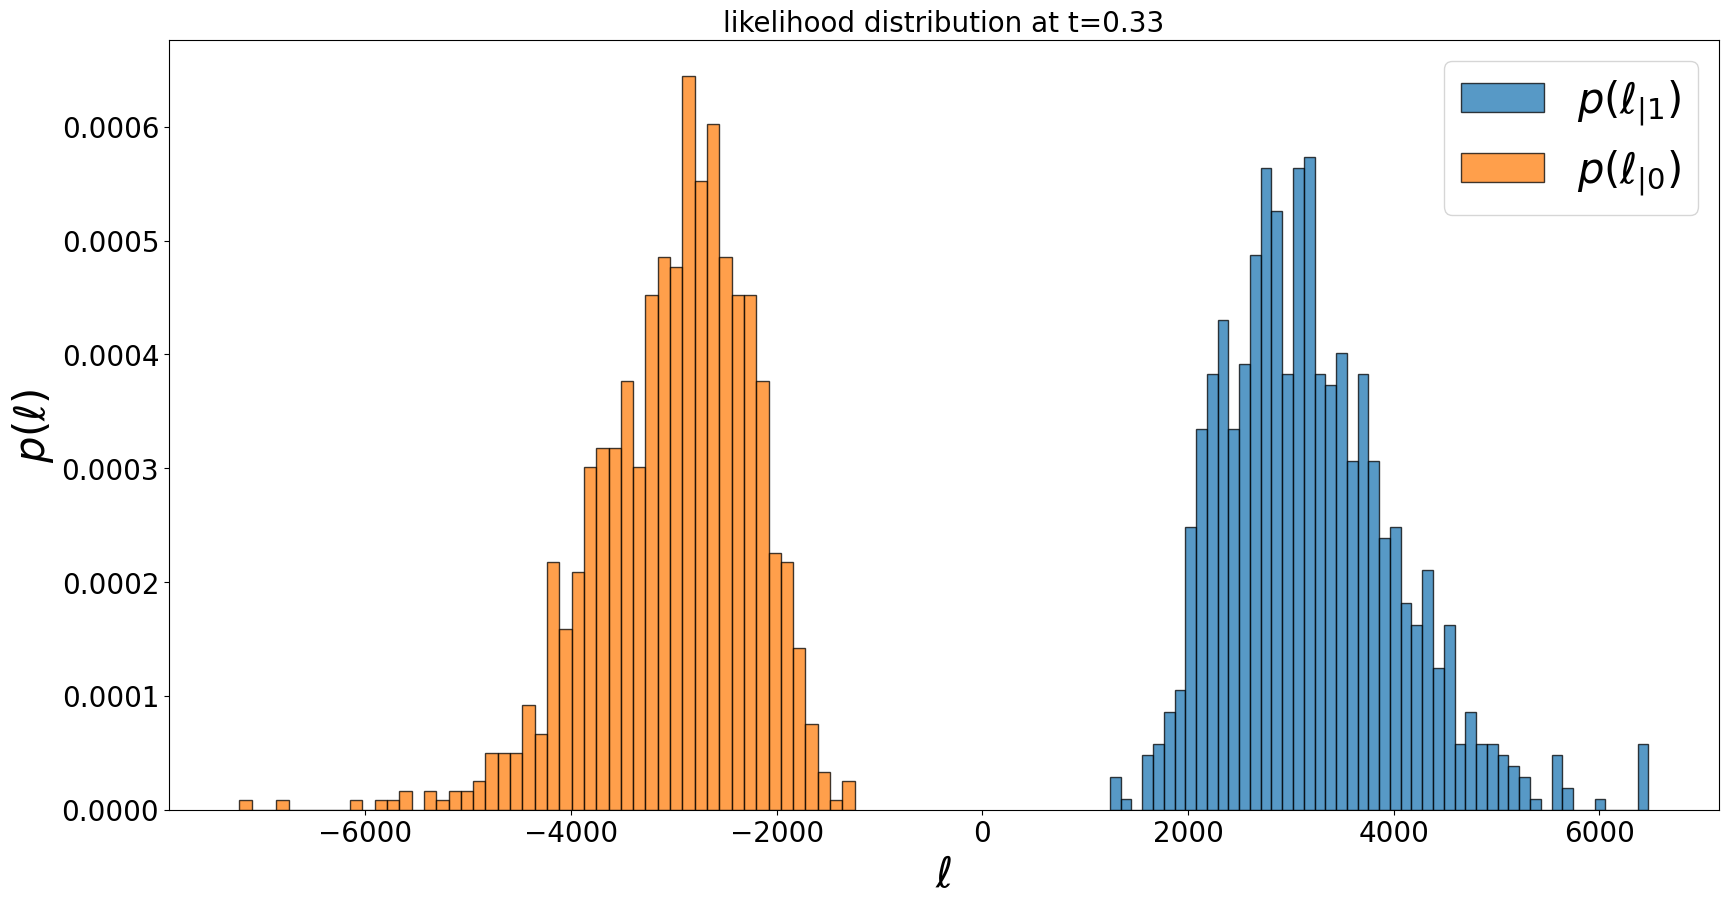

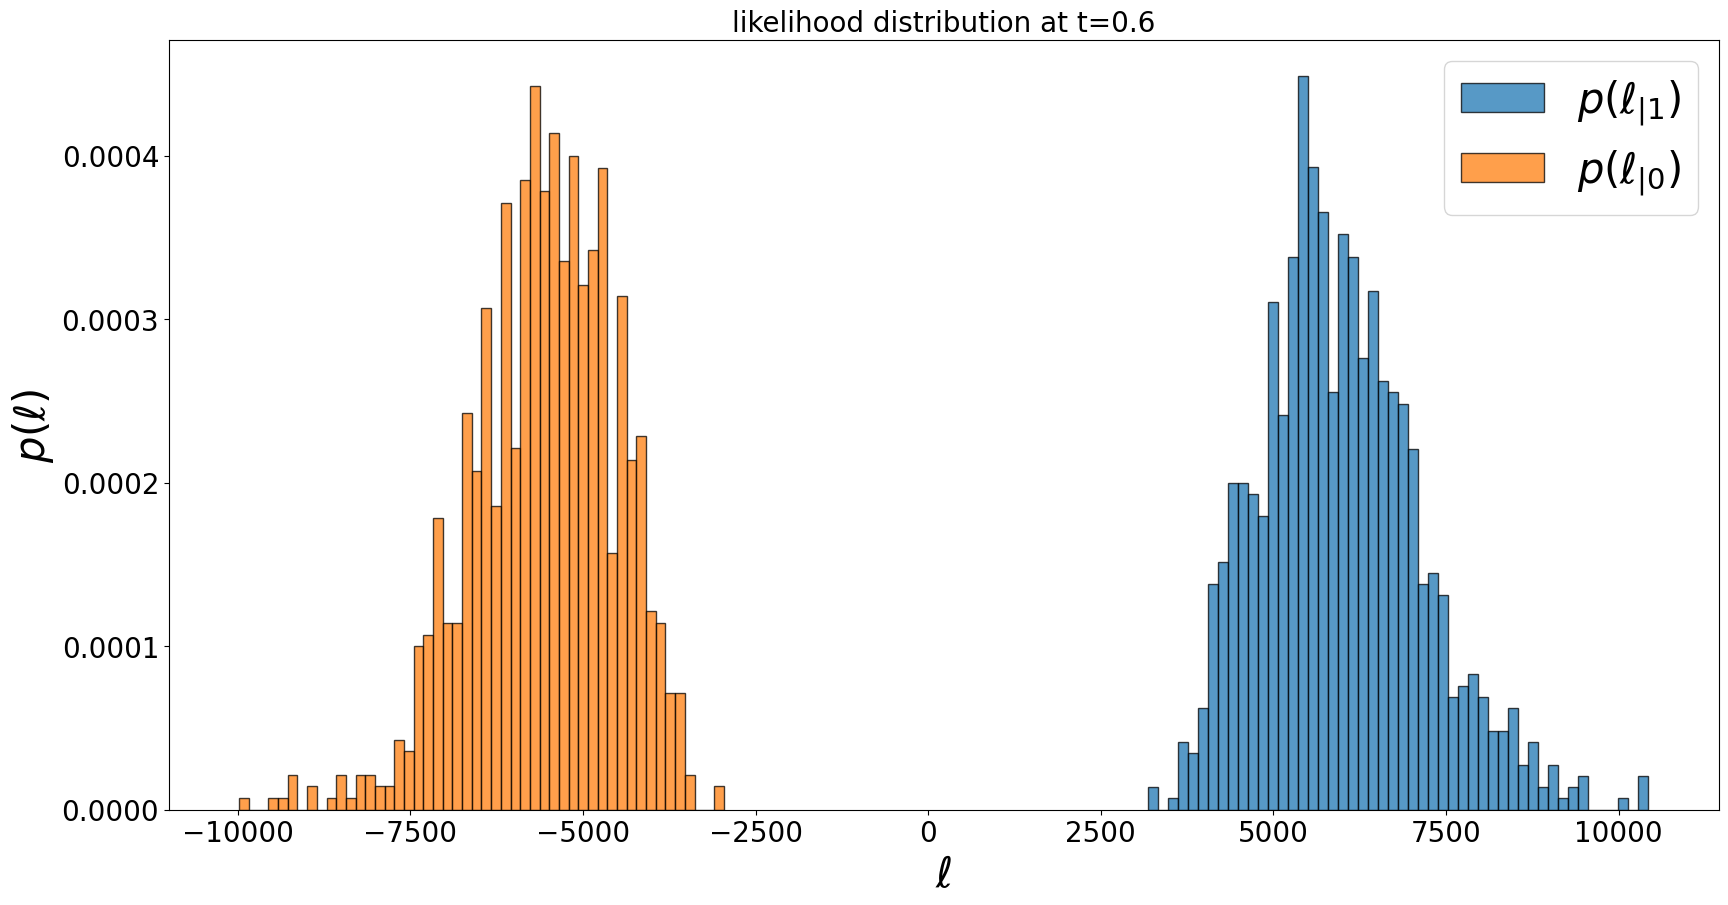

In [72]:
for indistats in np.linspace(10,len(timstats)-1,3).astype(int):
    
    plt.figure(figsize=(20,10))
    ax=plt.subplot()

    t = timstats[indistats]
    ax.set_title("likelihood distribution at t={}".format(np.round(t,2)),size=20)

    c1, b1 = np.histogram(ll1[:,indistats], bins=50, normed=True)
    c0, b0 = np.histogram(ll0[:,indistats], bins=50, normed=True)
    
    ax.bar(b1[:-1], c1, edgecolor="black", width=b1[1]-b1[0], alpha=0.75, label=r'$p(\ell_{|1})$')
    ax.bar(b0[:-1], c0, edgecolor="black",width=b0[1]-b0[0], alpha=0.75, label=r'$p(\ell_{|0})$')
    ax.set_xlabel(r'$\ell$',size=30)
    ax.set_ylabel(r'$p(\ell)$',size=30)
    ax.legend(prop={"size":30})
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.savefig("figures_freq/histo_liks_{}_200.pdf".format(indistats))

In [184]:
200/mu1

0.042187847113141656

In [74]:
import pickle as pkl

In [75]:
with open(path_data+"stop.pickle","rb") as g:
    stop = pickle.load( g)#, protocol=pickle.HIGHEST_PROTOCOL)

In [76]:
stops0 = [[] for k in range(len(bpos))]
stops1 = [[] for k in range(len(bpos))]

values1 = list(stop["_1"].values())
values0 = list(stop["_0"].values())
for k,val in enumerate(values1):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values1[k][indb]])[0] == True:
                stops1[indb].append(np.squeeze(values1[k][indb]))

for k,val in enumerate(values0):
    if len(val)!=0:
        for indb in range(len(val)):
            if ~np.isnan([values0[k][indb]])[0] == True:
                stops0[indb].append(np.squeeze(values0[k][indb]))


cons1, cons0 = [], []
anals1, anals0 = [], []
timbin0, timbin1 = [], []
for indb, b in enumerate(tqdm(bpos)):
    counts1, bins1 = np.histogram(stops1[indb], 50, density=True)
    counts0, bins0 = np.histogram(stops0[indb], 50, density=True)

    timms1 = np.linspace(0,np.max(bins1), 100)
    timms0 = np.linspace(0,np.max(bins0), 100)

    timbins1 = .5*(bins1[1:] + bins1[:-1])
    timbins0 = .5*(bins0[1:] + bins0[:-1])

    cons1.append(counts1)
    cons0.append(counts0)

    timbin1.append(timbins1)
    timbin0.append(timbins0)

  0%|                                                    | 0/21 [00:00<?, ?it/s]/home/giq/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
100%|█████████████████████████████████████████| 21/21 [00:00<00:00, 3478.69it/s]


In [77]:
def prob_craft(t, b, mu, S):
    div = (np.sqrt(2*np.pi)*S*(t**(3/2)))
    return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div

In [78]:
def fit_2moments(timind,l1_mean, l1_std, ini=10, fini=-1):

    sqrtimind = np.array(np.sqrt(timind))
    timind = np.array(timind)

    mu, oomu = np.polyfit(timind[ini:fini], np.abs(l1_mean)[ini:fini],1)
    sigma, oosig = np.polyfit(np.array(np.sqrt(timind))[ini:fini], l1_std[ini:fini],1)
    
    return [mu, oomu], [sigma, oosig]

In [79]:
timbin1[1][1] - timbin1[1][0]

0.0028677654539168984

In [80]:
1/np.sum(cons1[indb])

0.0007862957612984889

In [81]:
bpos

array([    0,   500,  1000,  1500,  2000,  2500,  3000,  3500,  4000,
        4500,  5000,  5500,  6000,  6500,  7000,  7500,  8000,  8500,
        9000,  9500, 10000])

In [82]:
ll1.shape#

(999, 100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_268953/1924418255.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div
/tmp/ipykernel_268953/1924418255.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return  abs(b)*np.exp(-((abs(b)-mu*t)**2)/(2*t*(S**2)))/div


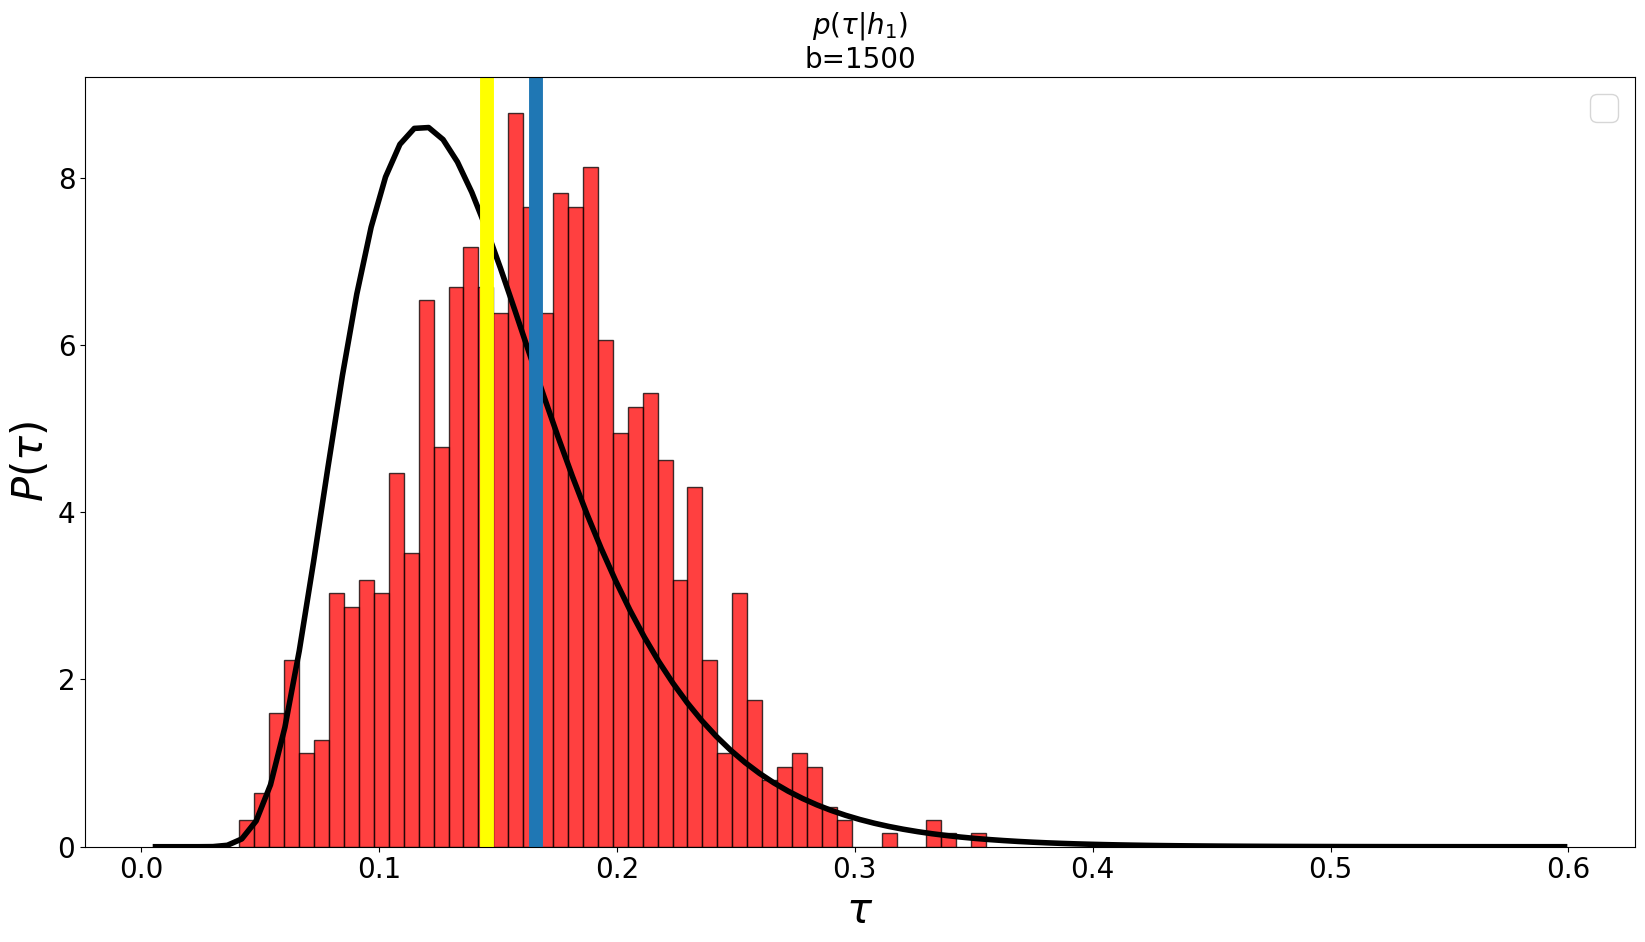

In [96]:
LS, TS = 30, 20
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
indb = 3
ax.bar(timbin1[indb], cons1[indb], width=timbin1[indb][1]-timbin1[indb][0], color="red", alpha=0.75, edgecolor="black")
ax.set_xlabel(r'$\tau$',size=LS)
ax.set_ylabel(r'$P(\tau)$', size=LS)
ax.tick_params(axis='both', which='major', labelsize=TS)
ax.legend(prop={"size":25})

[mu1, oomu1], [sigma1, oosig1] = fit_2moments(timind[::100],np.mean(ll1, axis=0),np.std(ll1, axis=0), ini=-10, fini=-1)

good = [prob_craft(tt, bpos[indb] , mu1, sigma1) for tt in timstats]

ax.set_title(r'$p(\tau|h_1)$' + "\nb={}".format(np.round(bpos[indb],3)), size=20)
ax.plot(timstats,good, linewidth=4,color="black", label="mu & sigma")
ax.axvline(np.sum(cons1[indb]*timbin1[indb])/np.sum(cons1[indb]), linewidth=10)
ax.axvline(bpos[indb]/mu1, linewidth=10, color="yellow")

In [95]:
timind[-1]

0.59839860068377